In [1]:
import os
import sys
sys.path.insert(0, '/home/kevinteng/Desktop/DE_Project')
import time
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from skimage.external import tifffile as sktiff
import scipy.io

In [2]:
import utils

In [3]:
tmp_list = []
for i in sorted(os.listdir("/home/kevinteng/Desktop/mat/")):
    tmp_path = os.path.join("/home/kevinteng/Desktop/mat/" + i)
    tmp = np.load(tmp_path)
    
    tmp_list.append(tmp)
    print(tmp.shape)
    
    if input() == 'exit':
        break

(202, 201)

(202, 201, 16)

(605, 16)
exit


# Mean ROI 

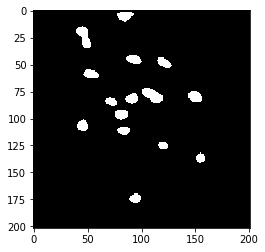

In [4]:
#shape (202, 201)
t = tmp_list[0]
t = np.asarray(t)

plt.imshow(t, cmap = 'gray')
plt.show()

# Mean individual ROI

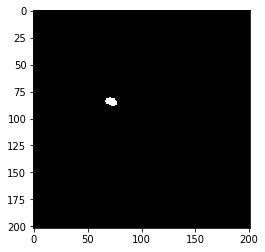

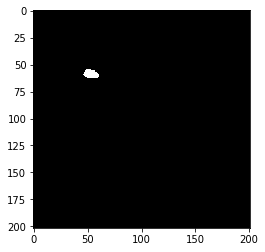

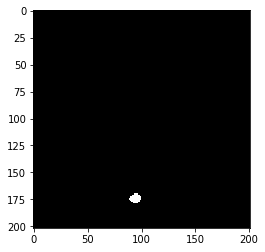

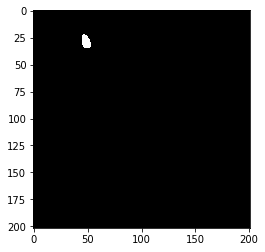

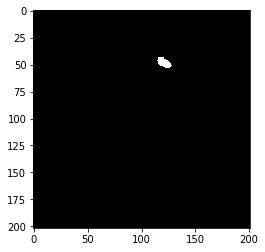

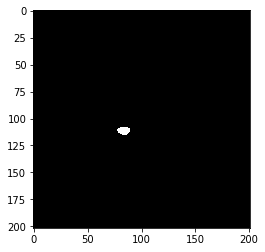

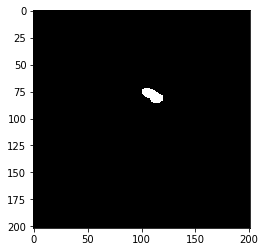

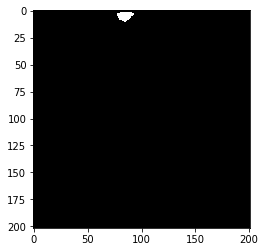

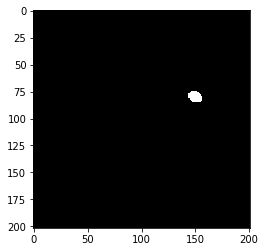

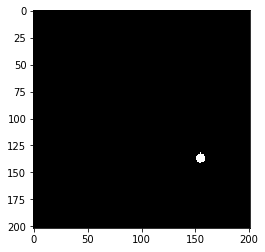

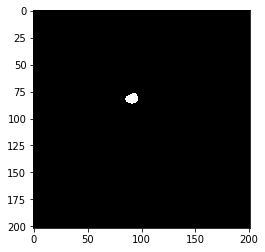

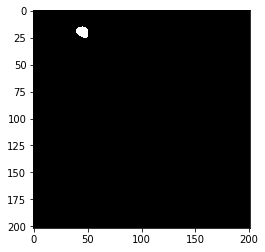

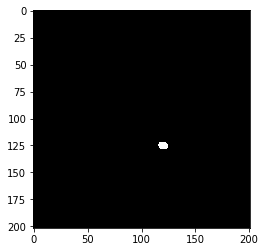

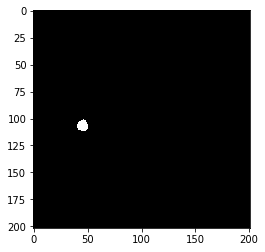

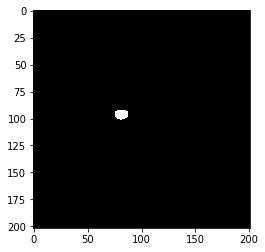

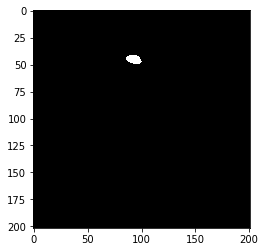

In [5]:
#shape (202, 201, 16)

t1 = tmp_list[1]
t1 = np.asarray(t1)

for i in range(t1.shape[2]):
    plt.imshow(t1[:,:,i], cmap = 'gray')
    plt.show()

# Grey ROI per Frames

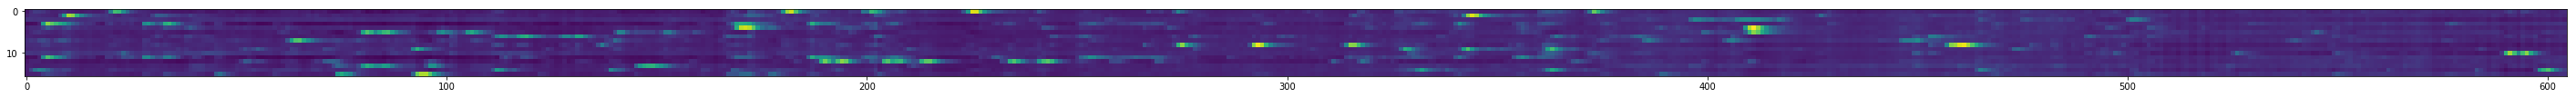

In [6]:
t3 = tmp_list[2]
t3 = np.asarray(t3)
t3 = t3.transpose()

plt.figure(figsize=(50,20))
plt.imshow(t3)
plt.savefig('grey_ROI.eps', format='eps', dpi=300)

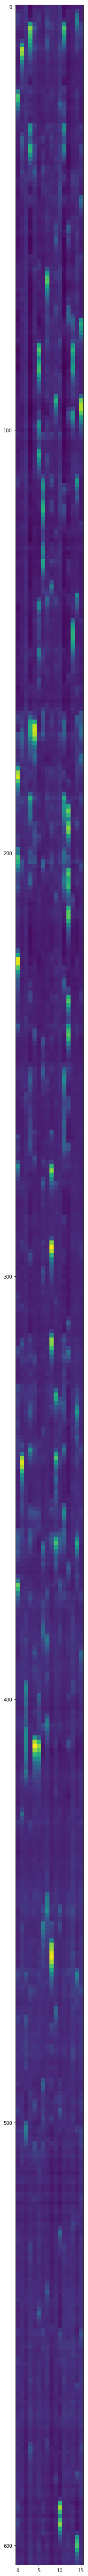

In [7]:
#shape (605, 16) framesize x #ROI
t4 = tmp_list[2]
t4 = np.asarray(t4)

plt.figure(figsize=(50,100))
plt.imshow(t4)
plt.show()

In [13]:
#returing index of the ROI with maximum value w.r.t Frames
index_list = []
for i in range(len(t4)):
    index_list.append(np.argmax(t4[i]))
    
np.asarray(index_list)

array([10, 14, 14, 14,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  0,  0, 11, 11, 11,  3,  3,  3,  1,  3,  3,
        3,  3,  3,  3,  4,  4,  4, 10, 10, 10, 10, 15, 15, 15, 15, 10,  7,
        9, 12, 12,  9,  9,  9,  9,  9, 15, 14, 14,  7,  7,  7,  7,  7,  7,
        7,  7,  7, 12, 12, 12, 15, 15, 15, 15, 15, 13,  5,  5,  5, 13,  5,
        5,  5,  5,  5,  5,  5,  5,  9, 15, 15, 15, 15, 15,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5, 14, 14,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        8,  8,  8, 14, 14,  5,  5,  5,  5, 13, 13, 13, 13, 13, 13, 13, 13,
        5,  5,  5,  5, 13,  5,  5,  5, 14, 14,  2,  2,  7,  6,  6,  3,  4,
        4,  4,  4,  4,  4,  4,  4,  4, 15, 15,  0,  0,  0,  0,  0,  0, 11,
        3, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12,  0,  0,  0

In [17]:
t4[0]

array([-1.65095257, -0.91173168,  0.16389373, -2.67115289, -0.96457788,
       -1.20562442, -0.84997039, -0.08884927, -0.34957776, -0.6455399 ,
        0.42167751, -2.569551  , -1.80109753, -1.34806956, -1.24058042,
       -1.36132097])

In [23]:
#returing index of the ROI with value > 0
index_list02 = []
for i in range(len(t4)):
    index_list02.append(np.where(t4[i]>0))

index_list02 

[(array([ 2, 10]),),
 (array([ 2,  7, 10, 14]),),
 (array([ 0,  2,  5,  7, 10, 14]),),
 (array([ 0,  2,  5,  7, 10, 14]),),
 (array([ 0,  2,  3,  4,  7,  8, 10, 11, 14, 15]),),
 (array([ 2,  3,  4,  7,  8, 10, 11, 14, 15]),),
 (array([ 2,  3,  4,  7, 10, 11, 14, 15]),),
 (array([ 2,  3,  4,  7, 10, 11, 14, 15]),),
 (array([ 1,  3,  4,  7, 10, 11, 14, 15]),),
 (array([ 1,  2,  3,  4,  5,  7,  8, 10, 11, 14, 15]),),
 (array([ 1,  2,  3,  4,  7, 10, 11, 14]),),
 (array([ 1,  2,  3,  4,  7, 10, 11]),),
 (array([ 1,  2,  3,  4,  7, 10, 11]),),
 (array([ 1,  3, 10]),),
 (array([ 1,  3, 10]),),
 (array([ 1,  2,  3, 10]),),
 (array([1, 2]),),
 (array([ 1,  2, 10]),),
 (array([ 1,  2, 10]),),
 (array([ 0,  1,  2, 10, 11]),),
 (array([ 0,  1,  2,  3,  8, 10, 11, 14]),),
 (array([ 0,  8, 10, 14]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([10, 11]),),
 (array([ 3,  4,  7,  8, 10, 11, 1

In [19]:
t4[604]

array([-0.19862697, -0.52678151, -1.49500809,  0.3448187 , -0.69180846,
        0.12519197, -0.61212902, -0.4061009 , -1.68004665, -1.09210501,
       -1.22366929,  0.05929373, -0.06632815, -0.47864306,  1.32893099,
        0.19849906])

In [24]:
print(np.min(t4))
print(np.max(t4))

-3.2658793105418127
21.069869148079988
